In [31]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
import control
import collections
import pandas as pd 

In [32]:
front_data = pd.read_csv('Front_Normal.csv', index_col=0, usecols=range(21))
front_data

,ESC signal (µs),Servo 1 (µs),Servo 2 (µs),Servo 3 (µs),AccX (g),AccY (g),AccZ (g),Torque (N·m),Thrust (kgf),Voltage (V),Current (A),Motor Electrical Speed (RPM),Motor Optical Speed (RPM),Electrical Power (W),Mechanical Power (W),Motor Efficiency (%),Propeller Mech. Efficiency (kgf/W),Overall Efficiency (kgf/W),Vibration (g),App message
Time (s),,,,,,,,,,,,,,,,,,,,
0.000000,1000.0,NaN,NaN,NaN,-1.011719,0.025391,0.013672,NaN,NaN,12.113388,-0.030684,3549,0,0.371690,NaN,32.812990,NaN,NaN,0.279297,NaN
0.000000,1000.0,NaN,NaN,NaN,-1.173828,0.042969,0.037109,-0.000325,NaN,12.113189,-0.030848,3549,0,0.373668,0.120796,32.327004,0.010261,0.003317,0.279297,NaN
0.028420,1000.0,NaN,NaN,NaN,-0.949219,-0.021484,0.007812,NaN,NaN,12.113191,-0.030710,3547,0,0.372001,NaN,32.456213,NaN,NaN,0.281250,NaN
0.053785,1000.0,NaN,NaN,NaN,-1.085938,0.005859,0.021484,NaN,-0.000069,12.112631,-0.029577,3551,0,0.358252,NaN,33.740975,NaN,NaN,0.279297,NaN
0.085815,1000.0,NaN,NaN,NaN,-0.912109,-0.064453,0.009766,NaN,NaN,12.112836,-0.029979,3551,0,0.363130,NaN,33.280888,NaN,NaN,0.277344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114.307335,NaN,NaN,NaN,NaN,-1.099609,0.003906,0.023438,NaN,-0.002699,11.858910,-0.028646,3575,0,0.339710,NaN,239.640186,NaN,NaN,0.267578,NaN
114.334755,NaN,NaN,NaN,NaN,-1.048828,-0.039062,0.019531,NaN,NaN,11.858849,-0.027530,3581,0,0.326472,NaN,249.806828,NaN,NaN,0.267578,NaN
114.355995,NaN,NaN,NaN,NaN,-1.048828,-0.082031,0.000000,NaN,NaN,11.859149,-0.028600,3583,0,0.339173,NaN,240.603262,NaN,NaN,0.267578,NaN


In [33]:
# creating variables from colom elements
thrust = front_data['Thrust (kgf)']
rpm = front_data['Motor Electrical Speed (RPM)']
pwm = front_data['ESC signal (µs)']
torque = front_data['Torque (N·m)']

In [34]:
#Values
rho = 1.225 #kg/m^3
r = 0.1778/2 #prop diam in m 
s = np.pi*r*r

In [35]:
#math to solve ct
q = 0.5*rho*(rpm*(2*np.pi/60)*r)**2
ct = thrust*(9.81)/(q*s)

In [36]:
#math to nodimensionalize pwm aka voltage relation
pwm_v = (pwm/1000)-1

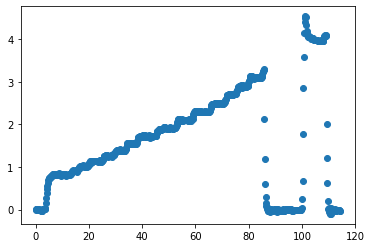

In [37]:
plt.plot(thrust*9.81,'o')

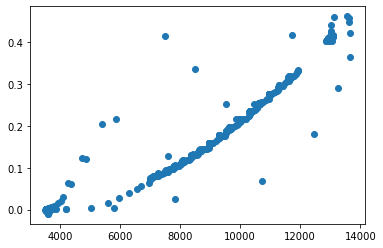

In [38]:
plt.plot(rpm,thrust,'o')

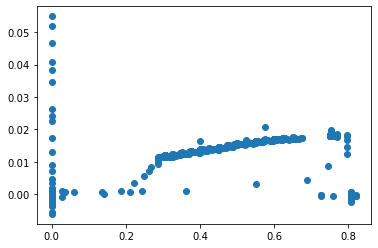

In [39]:
plt.plot(pwm_v,ct, 'o')

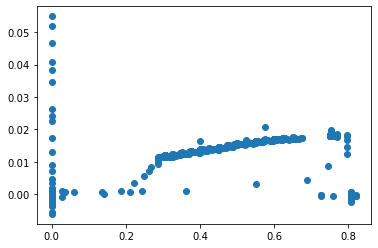

In [40]:
#average of ct
#ct = ct[500:3200]
#pwm_v = pwm_v[500:3200]
#num_ct = np.prod(ct.shape)
plt.plot(pwm_v,ct, 'o')

In [41]:
ct[12:78].mean()

0.014955039886102174

In [42]:
ct = ct[12:78]

In [43]:
ct = ct[np.abs(ct-ct.mean()) <= (0.9*ct.std())]

In [44]:
q[12:78].mean()

4735.313706742262

In [45]:
s

0.024828666475777392

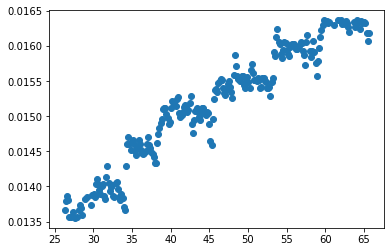

In [46]:
plt.plot(ct,'o')

In [47]:
ct.mean()

0.015169113148180063

In [48]:
ct.max()

0.016363205298362826

In [49]:
ct.min()

0.013552109160470472

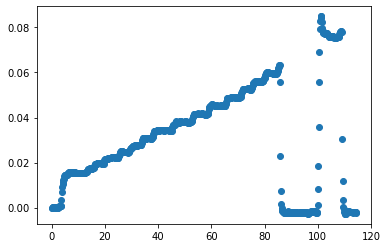

In [50]:
#torque section
plt.plot(torque,'o')

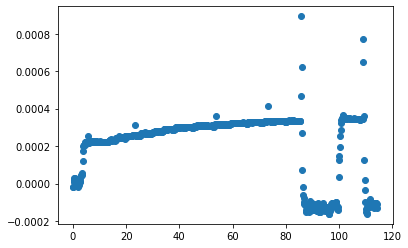

In [51]:
c_torque = torque/(q*s)
plt.plot(c_torque,'o')

In [52]:
c_torque = c_torque[12:78]
c_torque = c_torque[np.abs(c_torque-c_torque.mean()) <= (0.9*c_torque.std())]

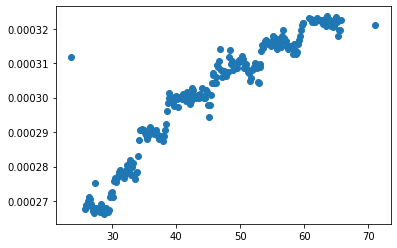

In [53]:
plt.plot(c_torque,'o')

In [54]:
c_torque.mean()

0.00030081539232903776

In [55]:
c_torque.min()

0.00026626914213022824

In [56]:
c_torque.max()

0.00032361114480061645

In [57]:
trust_test = ct.mean()*q*s
trust_test.mean()


1.6005111058071664